Choose a kernel:
1. Kernel 1
2. Kernel 2
3. Kernel 3
4. Custom Kernel
Enter your choice: 4
Enter the dimension of the custom kernel: 15


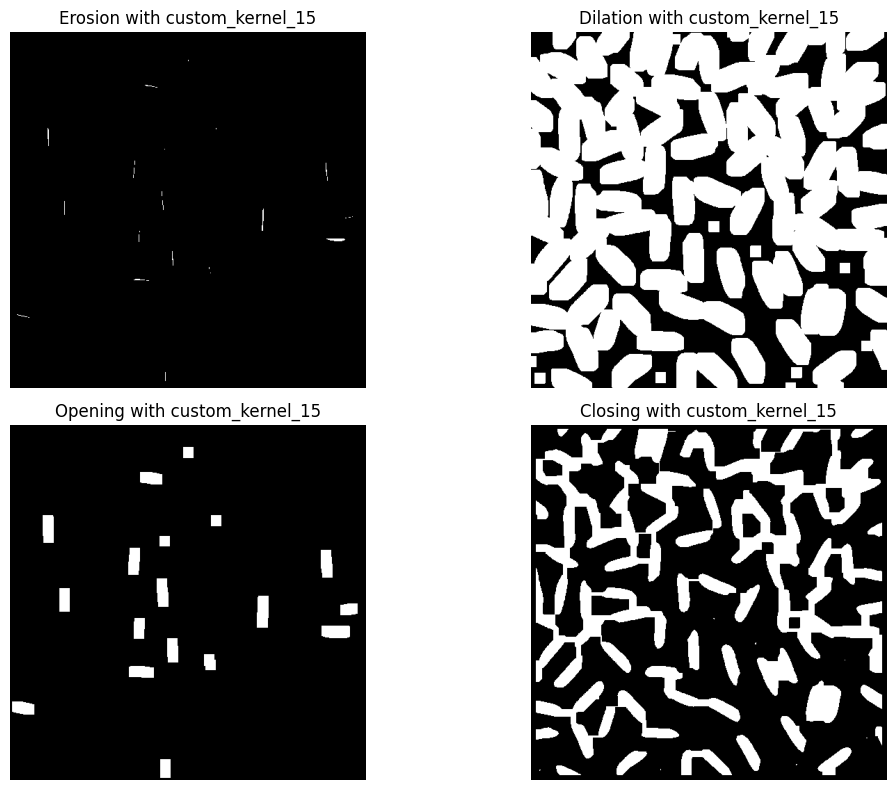

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread('ricegrains_mono.bmp', cv2.IMREAD_GRAYSCALE)

# Define kernels
kernel1 = np.array([[1, 1]], dtype=np.uint8)
kernel2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=np.uint8)
kernel3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

def generate_custom_kernel(dim):
    return np.ones((dim, dim), dtype=np.uint8)

# Custom erosion operation
def custom_erosion(x, b):
    y = [[0 for _ in range(len(x))] for __ in range(len(x[0]))]

    for i in range(len(x)):
        for j in range(len(x[0])):
            allWhite = True
            for i1 in range(len(b)):
                for j1 in range(len(b[0])):
                    if b[i1][j1] == 0:
                        continue
                    x_coord = i + i1 - int(len(b) / 2)
                    y_coord = j + j1 - int(len(b[0]) / 2)

                    if withinRange(x_coord, y_coord, len(x), len(x[0])) and x[x_coord][y_coord] == 255:
                        continue
                    else:
                        allWhite = False

            if allWhite:
                y[i][j] = 255

    return y

# Custom dilation operation
def custom_dilation(x, b):
    y = [[0 for _ in range(len(x))] for __ in range(len(x[0]))]

    for i in range(len(x)):
        for j in range(len(x[0])):
            if x[i][j] == 0:
                continue

            for i1 in range(len(b)):
                for j1 in range(len(b[0])):
                    if b[i1][j1] == 0:
                        continue
                    x_coord = i + i1 - int(len(b) / 2)
                    y_coord = j + j1 - int(len(b[0]) / 2)

                    if withinRange(x_coord, y_coord, len(x), len(x[0])):
                        y[x_coord][y_coord] = 255

    return y

# Custom opening operation
def custom_opening(x, b):
    return custom_dilation(custom_erosion(x, b), b)

# Custom closing operation
def custom_closing(x, b):
    return custom_erosion(custom_dilation(x, b), b)

# Define the withinRange function
def withinRange(i, j, n, m):
    return i >= 0 and i <= n - 1 and j >= 0 and j <= m - 1

# Main menu
print("Choose a kernel:")
print("1. Kernel 1")
print("2. Kernel 2")
print("3. Kernel 3")
print("4. Custom Kernel")
kernel_choice = int(input("Enter your choice: "))

if kernel_choice == 1:
    selected_kernel = kernel1
    kernel_name = "kernel1"
elif kernel_choice == 2:
    selected_kernel = kernel2
    kernel_name = "kernel2"
elif kernel_choice == 3:
    selected_kernel = kernel3
    kernel_name = "kernel3"
elif kernel_choice == 4:
    custom_kernel_dim = int(input("Enter the dimension of the custom kernel: "))
    selected_kernel = generate_custom_kernel(custom_kernel_dim)
    kernel_name = f'custom_kernel_{custom_kernel_dim}'
else:
    print("Invalid choice")
    exit()

# Apply all four operations to the image
erosion_result = custom_erosion(img, selected_kernel)
dilation_result = custom_dilation(img, selected_kernel)
opening_result = custom_opening(img, selected_kernel)
closing_result = custom_closing(img, selected_kernel)

# Create a 2x2 subplot to display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title(f'Erosion with {kernel_name}')
plt.imshow(erosion_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title(f'Dilation with {kernel_name}')
plt.imshow(dilation_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title(f'Opening with {kernel_name}')
plt.imshow(opening_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title(f'Closing with {kernel_name}')
plt.imshow(closing_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
